# Programming Assignment 1

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.8.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>

## Import statements

We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules.
</div>

In [1]:
from PA1lib import *

%matplotlib inline
# nice retina graphics on high-resolution screens
%config InlineBackend.figure_format='retina' 

# Linear Systems in Numpy

## Problem 1 （2 points）
Consider the matrices:

$A := \begin{pmatrix}
3\\
-2
\end{pmatrix}$

$B := \begin{pmatrix}
6 & 1\\
-3 & 5
\end{pmatrix}$

$C := \begin{pmatrix}
7 & 3\\
-2 & 9
\end{pmatrix}$

$D := \begin{pmatrix}
6 & -2\\
-3 & -4\\
9 & 8
\end{pmatrix}$


Compute the following values using NumPy and print them out. If the values are undefined, briefly explain why.

* $4A$
* $5B-2C$
* $CA$
* $A^TD^T$
* $DC$
* $CB$
* $CB^T$

*Hint:*
Remember that you can create and print a (for example $2\times3$) matrix using code like:
```python
a = np.array([[5, 5, -2],
             [2, 0,  4]])

print(f'a =\n{a}')
```
Most arithmetic operations are defined for NumPy arrays element-wise. Also, if you have two NumPy arrays `A` and `B`, you can perform matrix-matrix (or matrix-vector) multiplication using the `@` operator as `A @ B`. You can compute the transpose of a matrix using `A.T`.


In [2]:
#
# you may want to define some common set up code here
#

a = np.array([[3],[-2]])
a_t = a.T
b = np.array([[6, 1],[-3, 5]])
b_t = b.T
c = np.array([[7, 3],[-2, 9]])
c_t = c.T
d = np.array([[6, -2],[-3, -4], [9, 8]])
d_t = d.T

# TODO: put your answer below (leave as None if undefined)
four_A = 4*a
five_B_minus_two_C = 5*b - 2*c
CA = c@a
At_Dt = a_t@d_t
DC = d@c
CB = c@b
C_Bt = c@b_t

print(f'4A =\n{four_A}')
print(f'5B - 2C =\n{five_B_minus_two_C}')
print(f'CA =\n{CA}')
print(f'A^t D^t =\n{At_Dt}')
print(f'DC =\n{DC}')
print(f'CB =\n{CB}')
print(f'C B^t =\n{C_Bt}')

4A =
[[12]
 [-8]]
5B - 2C =
[[ 16  -1]
 [-11   7]]
CA =
[[ 15]
 [-24]]
A^t D^t =
[[22 -1 11]]
DC =
[[ 46   0]
 [-13 -45]
 [ 47  99]]
CB =
[[ 33  22]
 [-39  43]]
C B^t =
[[45 -6]
 [-3 51]]


## Problem 2 (3 points)
Here we ask you to implement your own matrix-matrix multiplication and matrix transpose operations by calculating the value of each matrix element using its linear algebra definitions and compare the results to the ones you have calculated with the built-in NumPy functions:

a) Write your own matrix-matrix (or matrix-vector) multiplication function.

b) Compute the transpose of a matrix without using .T

In [3]:
def Matrix_Multiplication(M_A, M_B):
    #check the sizes of M_A and M_B
    m_a_ROWS = len(M_A)
    m_a_COLUMNS = len(M_A[0])
    m_b_ROWS = len(M_B)
    m_b_COLUMNS = len(M_B[0])
    
    M_AB = []
    if m_a_COLUMNS == m_b_ROWS:
    #Multiplication
        i=0
        while i < m_a_ROWS:
            m_ab_row = []
            j=0
            while j < m_b_COLUMNS:
                m_ab_column = 0
                p=0
                while p < m_a_COLUMNS:
                    m_ab_column += M_A[i][p]*M_B[p][j]
                    p+=1
                m_ab_row.append(m_ab_column)
                j+=1
            M_AB.append(m_ab_row)
            i+=1            
        
    return M_AB

In [4]:
def Transpose(M):
    m_ROWS = len(M)
    m_COLUMNS =len(M[0])
    M_t = []
    for i in range(0, m_COLUMNS):
        M_t_row = []
        for j in range(0, m_ROWS):
            M_t_row.append(M[j][i])
        M_t.append(M_t_row)

    return M_t

In [5]:
# test cases

# as calculated in Problem 1
print("As in Problem 1: ")
print(f'A^t D^t =\n{At_Dt}')
print(f'DC =\n{DC}')
print(f'CB =\n{CB}')
print(f'C B^t =\n{C_Bt}')

# recalculated using scripts from Problem 2
a_T = Transpose(a)
b_T = Transpose(b)
d_T = Transpose(d)
MM_At_Dt = Matrix_Multiplication(a_T, d_T)
MM_DC = Matrix_Multiplication(d, c)
MM_CB = Matrix_Multiplication(c, b)
MM_C_Bt = Matrix_Multiplication(c, b_T)

# print the newer versions
print("\nAs in Problem 2: ")
print(f'A^t D^t =\n{MM_At_Dt}')
print(f'DC =\n{MM_DC}')
print(f'CB =\n{MM_CB}')
print(f'C B^t =\n{MM_C_Bt}')


As in Problem 1: 
A^t D^t =
[[22 -1 11]]
DC =
[[ 46   0]
 [-13 -45]
 [ 47  99]]
CB =
[[ 33  22]
 [-39  43]]
C B^t =
[[45 -6]
 [-3 51]]

As in Problem 2: 
A^t D^t =
[[22, -1, 11]]
DC =
[[46, 0], [-13, -45], [47, 99]]
CB =
[[33, 22], [-39, 43]]
C B^t =
[[45, -6], [-3, 51]]


## Problem 3 (3 points)

For the following systems of equations, formulate each as a linear system in python in matrix form as $M\mathbf{u} = \mathbf{v}$
and solve the linear system (use the NumPy function `np.linalg.solve`). Provide both your code and print your solution to the system of equations.

Solve:

a)
$$
\begin{align}
6x+5y &= 17\\
2x+y &= 5
\end{align}
$$

In [6]:
# put your answer here
M_a = np.array([[6, 5], [2, 1]])
v_a = np.array([[17], [5]])
u_a = np.linalg.solve(M_a, v_a)

print(f'u_a =\n{u_a}')

u_a =
[[2.]
 [1.]]


b)
$$
\begin{align}
-x+3y-3z &= -8\\
4x+5y-z &= 14\\
x+3y+2z &= 16
\end{align}
$$

In [7]:
# put your answer here
M_b = np.array([[-1, 3, -3], [4, 5, -1], [1, 3, 2]])
v_b = np.array([[-8], [14], [16]])
u_b = np.linalg.solve(M_b, v_b)

print(f'u_b =\n{u_b}')

u_b =
[[2.]
 [2.]
 [4.]]


c)
$$
\begin{align}
-4x+2z &= 14\\
-2x-4z &= 22\\
x+y+z &= -12
\end{align}
$$

In [8]:
# put your answer here
M_c = np.array([[-4, 0, 2], [-2, 0, -4], [1, 1, 1]])
v_c = np.array([[14], [22], [-12]])
u_c = np.linalg.solve(M_c, v_c)

print(f'u_c =\n{u_c}')

u_c =
[[-5.]
 [-4.]
 [-3.]]


d)
$$
\begin{align}
-3x+9 &= z\\
3y-6 &= 3x\\
-4x+5y+2z &= 5
\end{align}
$$

In [9]:
# put your answer here
M_d = np.array([[-3, 0, -1], [-3, 3, 0], [-4, 5, 2]])
v_d = np.array([[-9], [6], [5]])
u_d = np.linalg.solve(M_d, v_d)

print(f'u_d =\n{u_d}')

u_d =
[[ 4.6]
 [ 6.6]
 [-4.8]]


## Problem 4 (2 points)

For the four systems of equations from question 3, visualize each system by plotting the corresponding lines (for two-dimensional systems) and planes (for three-dimensional systems) in the system. Additionally, plot the solution to confirm that the system intersects at that point.

Use the functions provided in `sa4lib.py` (already imported for you above) as follows:

For 2D systems plot the line for each equation and their intersection point using:
* `plot2Dline()` : given an equation in the form $ax+by=c$, plot the corresponding line by calling `plot2Dline(a, b, c)`.
* `plot2Dpoint()` : given a point with coordinates $(x,y)$, plot the point by calling `plot2Dpoint(x, y)`.


For 3D systems plot the plane for each equation and ther intersection using:
* `plot3Dplane()` : given an equation in the form $ax + by + cz = d$, plot the corresponding plane by calling `plot3Dplane(a, b, c, d)`.
* `plot3Dpoint()` : given a point with coordinates $(x,y,z)$, plot the point by calling `plot3Dpoint(x, y, z)`.

In [10]:
# switch to `notebook` backend to allow for graph interaction (try out rotating 3D graphs)
# repeated command necessary on some machines due to issues in MPL backend switching
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


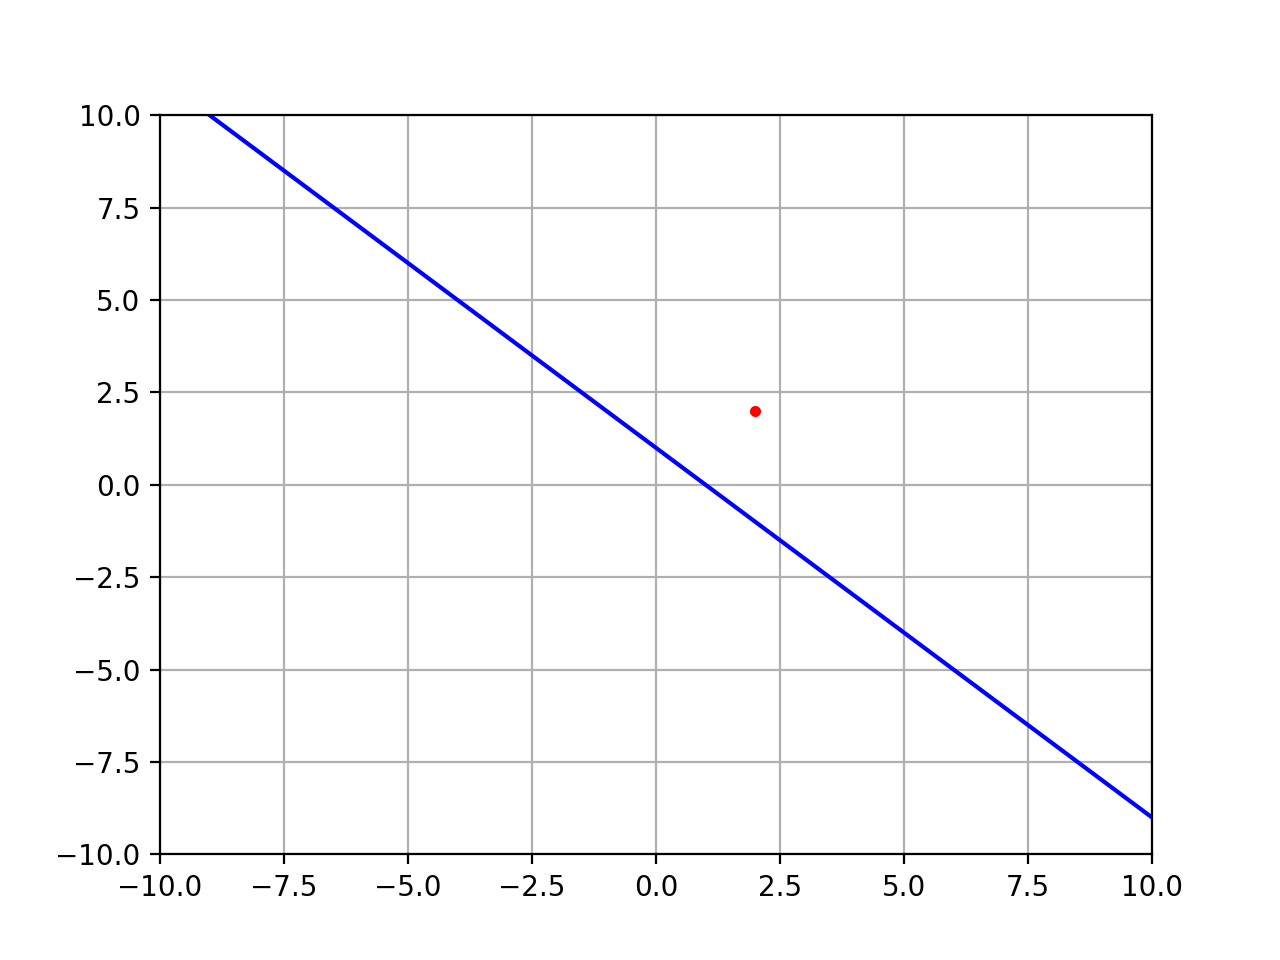

In [11]:
# EXAMPLE: for line x + y = 1, point 2, 2
newPlot()
plot2Dline(1, 1, 1)
plot2Dpoint(2, 2)
plt.show()

<IPython.core.display.Javascript object>


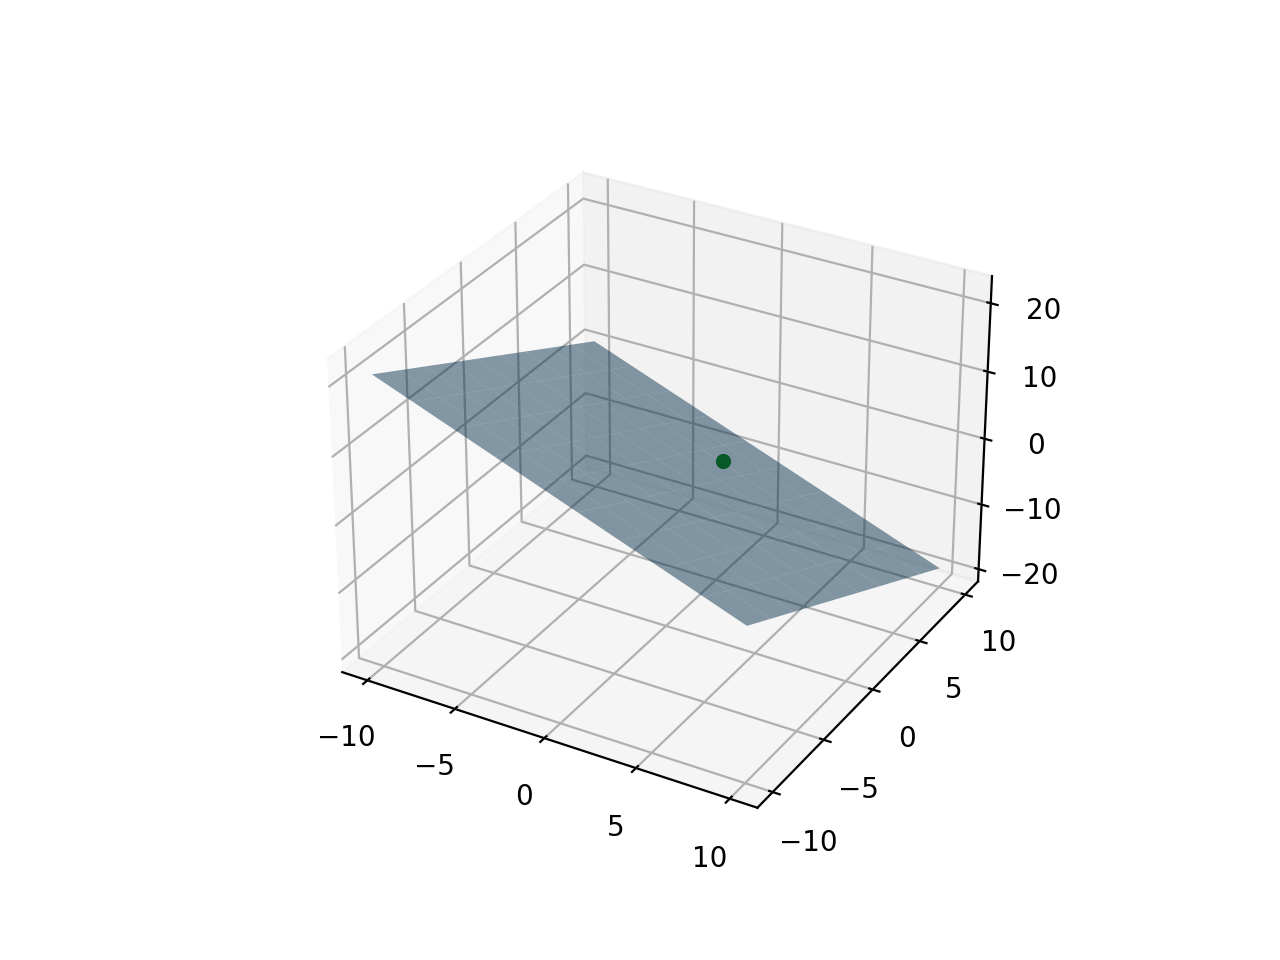

/Users/macytoppan/PA1lib.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/Users/macytoppan/PA1lib.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


In [12]:
# EXAMPLE: for plane x + y + z = 1, and point 2, 2, 2
new3Dplot()
plot3Dplane(1, 1, 1, 1)
plot3Dpoint(2, 2, 2)
plt.show()

<IPython.core.display.Javascript object>


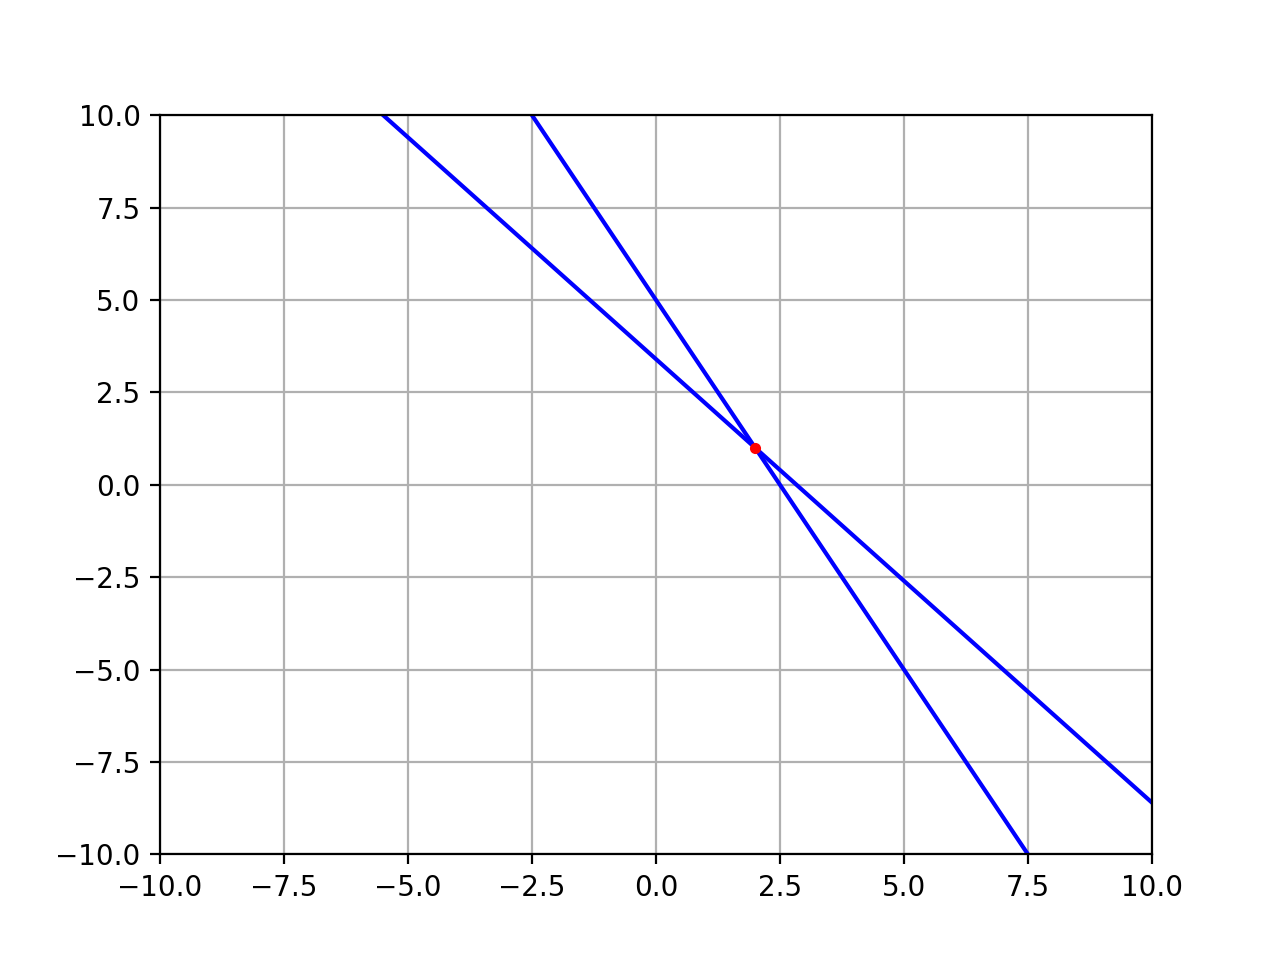

<IPython.core.display.Javascript object>


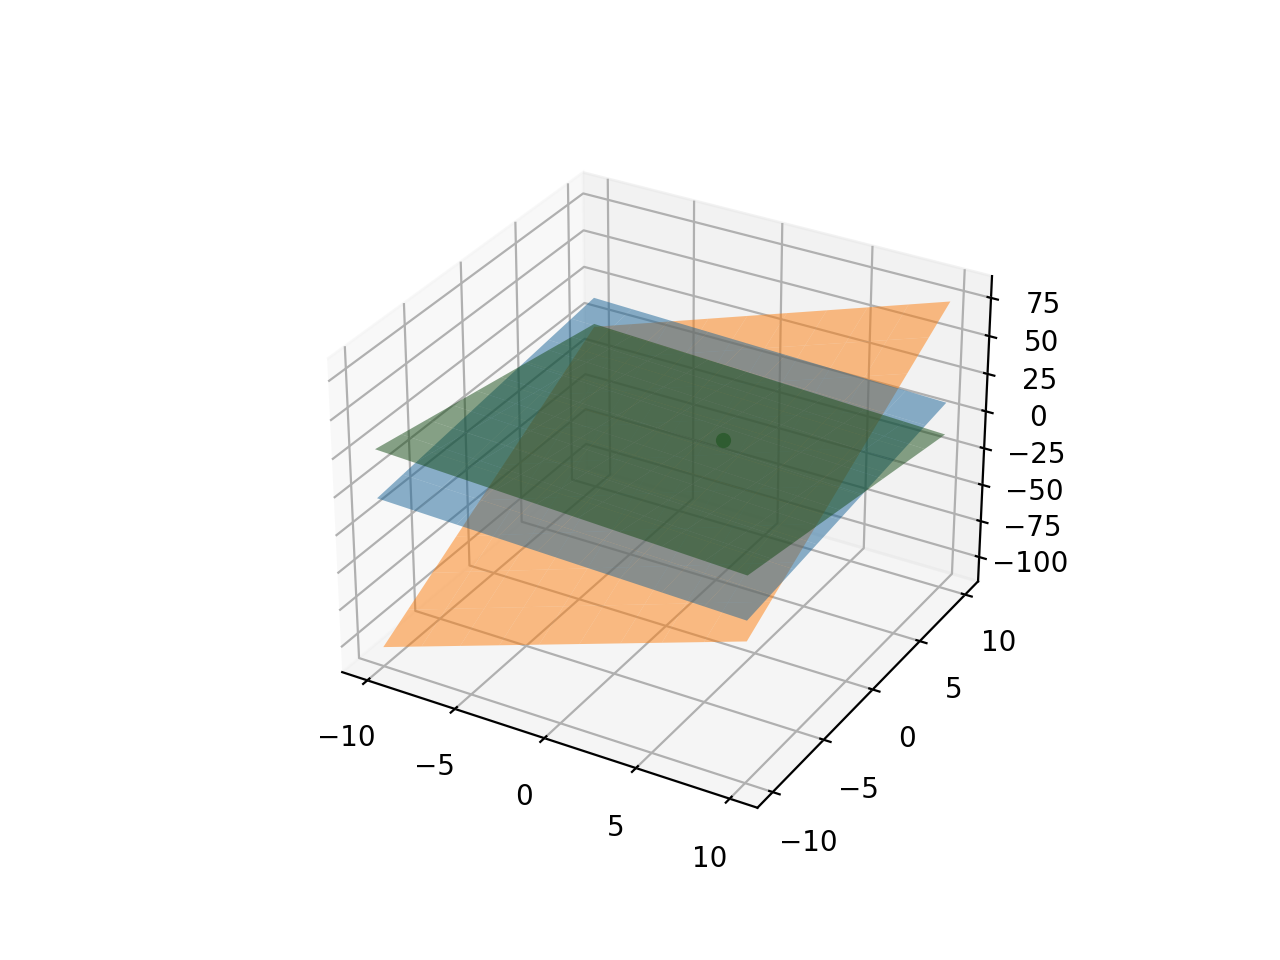

/Users/macytoppan/PA1lib.py:22: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/Users/macytoppan/PA1lib.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


<IPython.core.display.Javascript object>


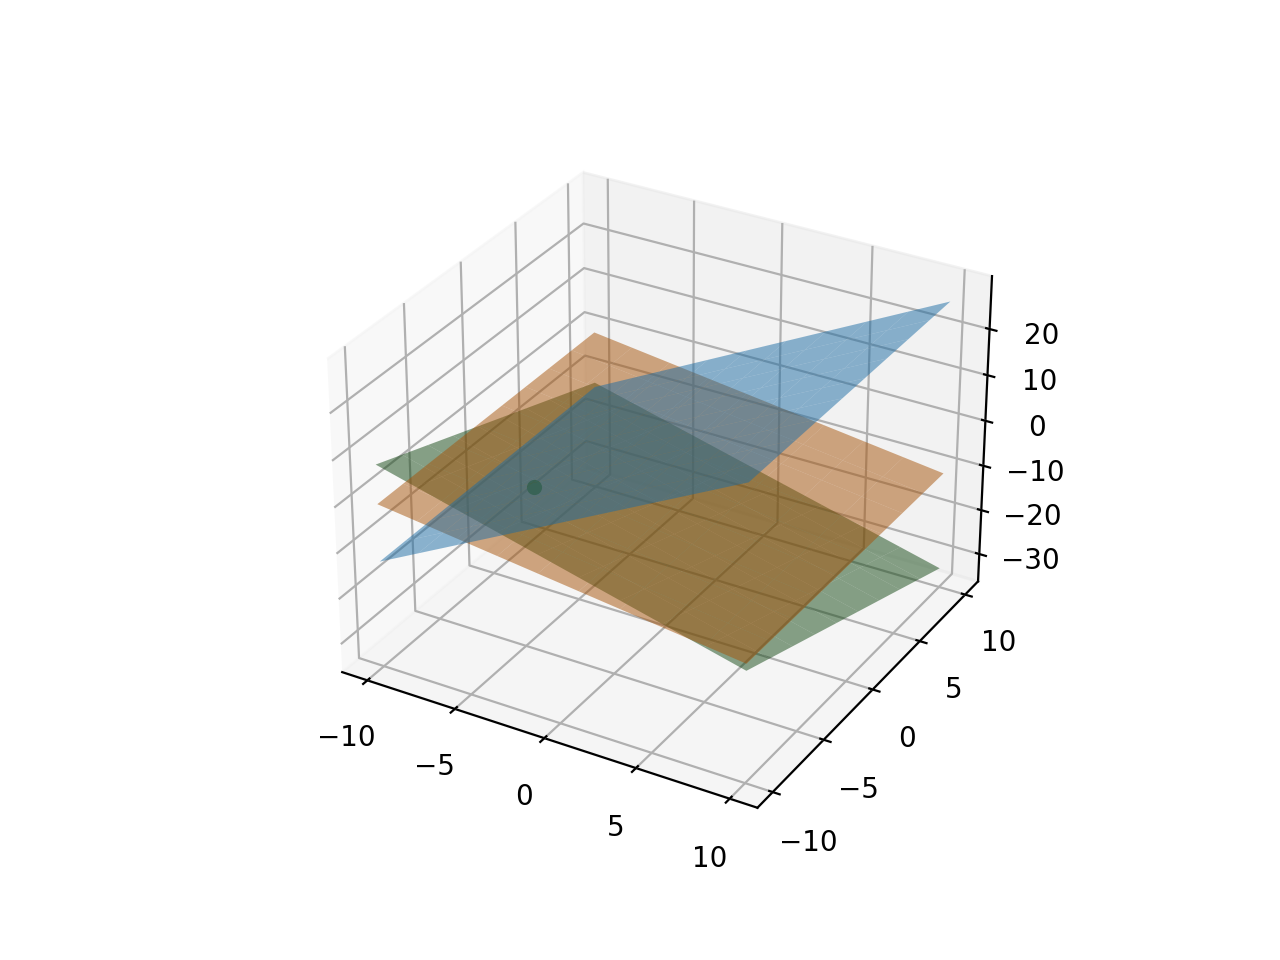

<IPython.core.display.Javascript object>


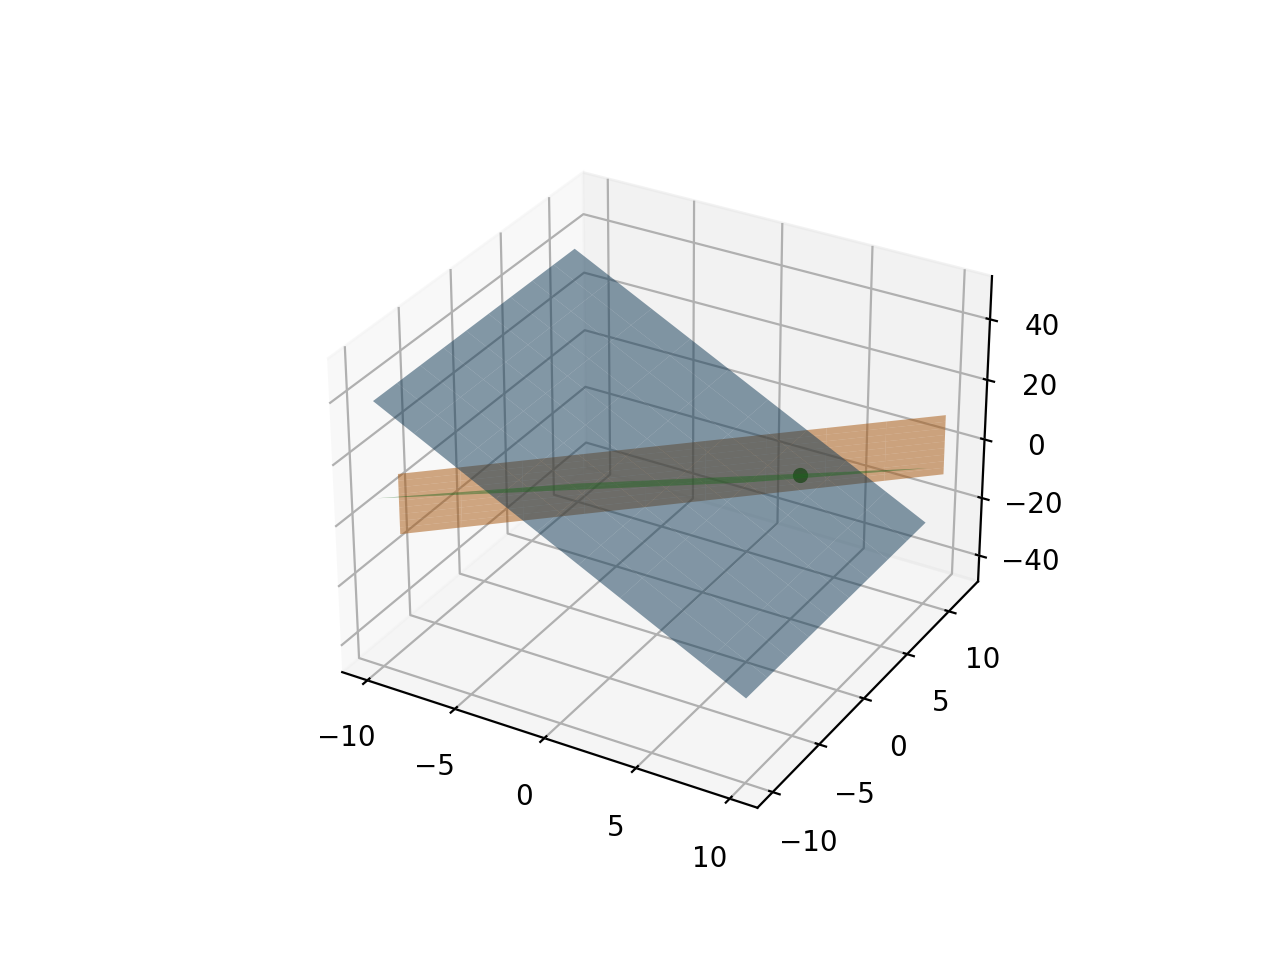

In [14]:
# put your answer here
# for 3A
newPlot()
plot2Dline(6, 5, 17)
plot2Dline(2, 1, 5)
plot2Dpoint(2, 1)

# for 3B
new3Dplot()
plot3Dplane(-1, 3, -3, -8)
plot3Dplane(4, 5, -1, 14)
plot3Dplane(1, 3, 2, 16)
plot3Dpoint(2, 2, 4)

# for 3C
new3Dplot()
plot3Dplane(-4, 0, 2, 14)
plot3Dplane(-2, 0, -4, 22)
plot3Dplane(1, 1, 1, -12)
plot3Dpoint(-5, -4, -3)

# for 3D

new3Dplot()
plot3Dplane(-3, 0, -1, -9)
plot3Dplane(-3, 3, 0, 6)
plot3Dplane(-4, 5, 2, 5)
plot3Dpoint(4.6, 6.6, -4.8)

# print them!
plt.show()

## Submitting your work

Before handing in via Canvas, make sure:
  * your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
  * you've included any scans/images that your notebook references.
  * you've renamed the provided notebook according to your name and netid as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has netid **F00237S**, his submission filename for SA1 should be **John_Doe_F00237S_SA1.ipynb**.